This notebook implements W-net for unsupervised classification on videos:

In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

import glob
import cv2

from skimage.io import imread

from util import get_inputs, get_unet


In [19]:
# read in one image
# Display result
img = cv2.imread('./data/frame9000.jpg')


In [20]:
# image dimensions
img.shape

(1080, 1920, 3)

In [21]:
# check if there are 3 channels:
len(img.shape)

3

In [22]:
# print min and max values in the image for each channel
# RGB colors are defined on 0-255 scale (so will need to rescale)

# read
print(img[:, 0].min())
print(img[:, 0].max())

# green
print(img[:, 1].min())
print(img[:, 1].max())

# blue
print(img[:, 2].min())
print(img[:, 2].max())

46
204
58
206
50
207


In [23]:
# input images and preview
files_img = glob.glob('./data/*00.jpg')

<IPython.core.display.Javascript object>


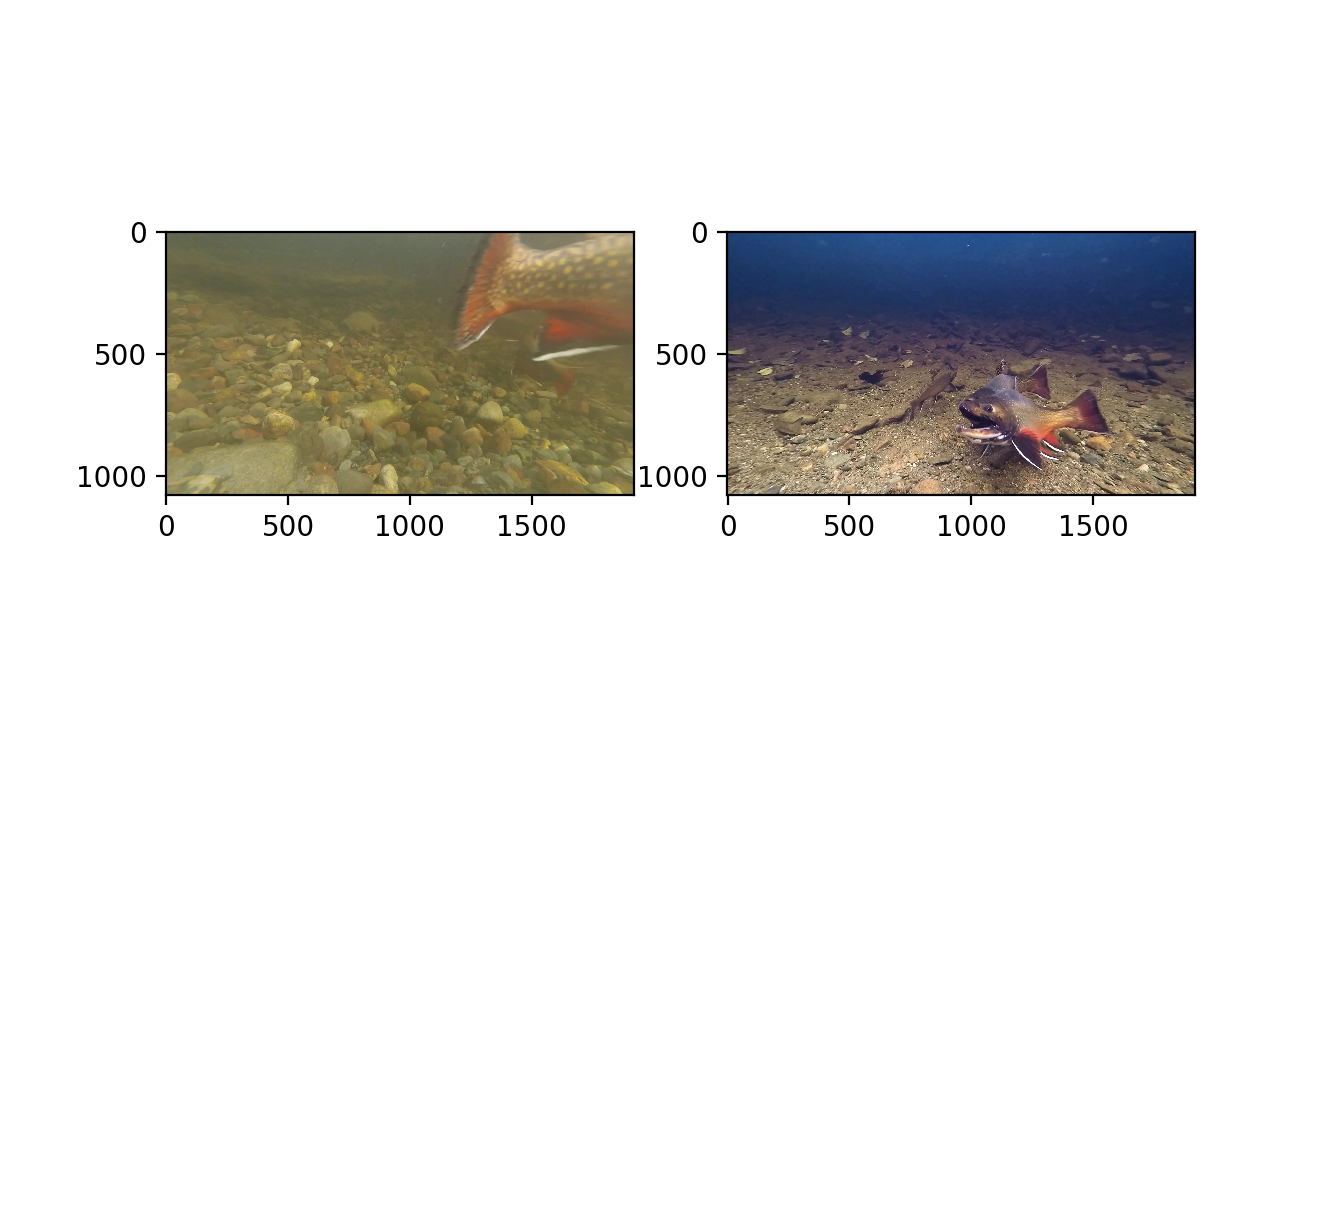

In [24]:
%matplotlib notebook

nplot = 2

nx = len(files_img)
temp_idx = np.random.randint(0, nx, nplot)

plt.figure(figsize = (nplot, 3))
for i, j in enumerate(temp_idx):
    img_temp = imread(files_img[j])

    plt.subplot(2, nplot, i+1)
    plt.imshow(img_temp)

plt.show()

In [25]:
x = get_inputs(files_img)

In [26]:
len(x)

116

In [27]:
%%time

nx, width, height, colors = x.shape

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.11 µs


In [28]:
x = np.squeeze(x)

In [29]:
print(nx)
print(width)
print(height)
print(colors)

116
1024
1024
1


<IPython.core.display.Javascript object>


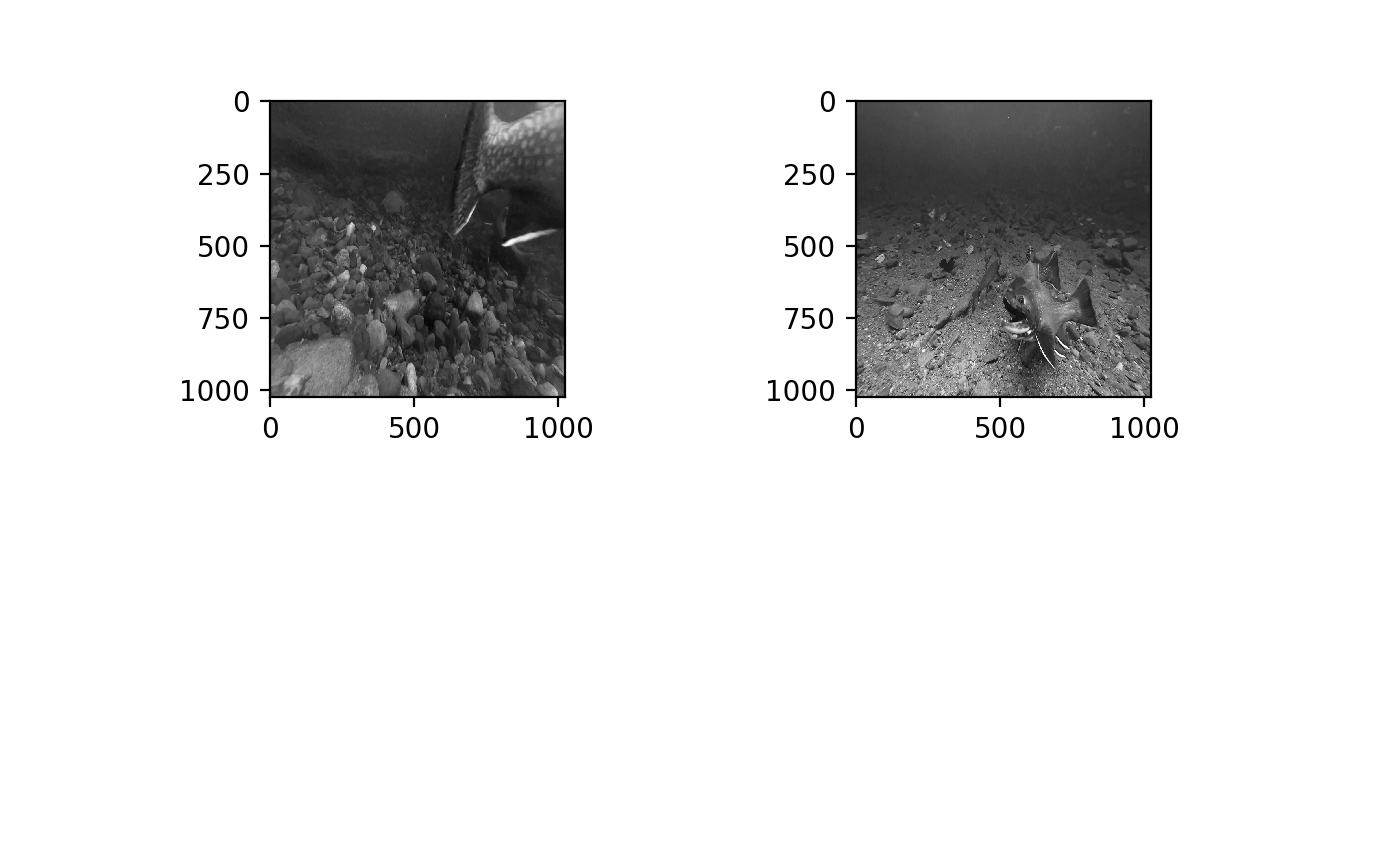

In [30]:
plt.figure(figsize = (nplot, 3))
for i, j in enumerate(temp_idx):

    plt.subplot(2, nplot, i+1)
    plt.imshow(x[j], cmap = 'gray')

plt.show()

In [31]:
# split data into training and validation sets

x.shape



(116, 1024, 1024)

In [41]:
# construct model
model = get_unet(img_height=x.shape[1], img_width=x.shape[2], img_channels=1)

# specify optimization procedure parameters
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mae'])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 1024, 1024, 1 0                                            
__________________________________________________________________________________________________
conv2d_39 (Conv2D)              (None, 1024, 1024, 8 80          input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_40 (Conv2D)              (None, 1024, 1024, 8 584         conv2d_39[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_9 (MaxPooling2D)  (None, 512, 512, 8)  0           conv2d_40[0][0]                  
__________________________________________________________________________________________________
conv2d_41 

In [ ]:
# train W-net to do unsupervised classification

In [ ]:
# set parameters for training 
batch_size = 128
epochs=100
unique_name = petname.name()
model_filename = 'model_' + unique_name + '.h5'
history_filename = 'results_' + unique_name + '.npz'
earlystopper = EarlyStopping(patience = 100, verbose = 1)
checkpointer = ModelCheckpoint(model_filename, verbose = 1, save_best_only = True)
tensorboard = TensorBoard(log_dir = 'tensorboard_logs/')
callbacks = [earlystopper, checkpointer]

In [ ]:
%%time

# train and save results
results = model.fit( x_train, x_train, batch_size = batch_size,
                    epochs = epochs,
                    callbacks = callbacks)


In [ ]:
with open(history_filename, 'wb') as file_pi:
    pickle.dump(results.history, file_pi)